## Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import SVG, Markdown, display, display_pretty
pd.set_option('display.max_columns', None)

In [2]:
np.set_printoptions(precision=4)
np.set_printoptions(suppress=True)

## Load data

In [3]:
df = pd.read_csv('results.csv')

In [4]:
df.shape

(405, 68)

In [5]:
df.head()

,experiment n.,Input transform,Output transform,Reconstruction Loss,Latent Space,Bioma Autoencoder,Domain Autoencoder,Activation Encoder,Activation Decoder,Activation Latent,CV folds,Epochs,Batch Size,Learning Rate Scheduler,Learning Rate,Optimizer,best_lost_epoch,loss,loss_min,loss_max,bioma_loss,bioma_loss_min,bioma_loss_max,domain_loss,domain_loss_min,domain_loss_max,latent_loss,latent_loss_min,latent_loss_max,bioma_mse,bioma_mse_min,bioma_mse_max,bioma_mae,bioma_mae_min,bioma_mae_max,bioma_mape,bioma_mape_min,bioma_mape_max,bioma_BrayCurtis,bioma_BrayCurtis_min,bioma_BrayCurtis_max,bioma_pearson_corr,bioma_pearson_corr_min,bioma_pearson_corr_max,bioma_jensen_shannon_divergence,bioma_jensen_shannon_divergence_min,bioma_jensen_shannon_divergence_max,domain_mse,domain_mse_min,domain_mse_max,domain_mae,domain_mae_min,domain_mae_max,domain_mape,domain_mape_min,domain_mape_max,domain_BrayCurtis,domain_BrayCurtis_min,domain_BrayCurtis_max,domain_pearson_corr,domain_pearson_corr_min,domain_pearson_corr_max,domain_jensen_shannon_divergence,domain_jensen_shannon_divergence_min,domain_jensen_shannon_divergence_max,latent_mae,latent_mae_min,latent_mae_max
0,0,none,ReLU,MeanSquaredError,10,b -> 512 -> 256 -> 10 -> 256 -> 512 -> b,d -> 32 -> 16 -> 10 -> 256 -> 512 -> b,tanh,tanh,tanh,5,100,128,none,constant = 0.01,Adam,99,665020.333929,547142.906250,8.277819e+05,322898.25000,273571.468750,413890.93750,342121.81250,273571.46875,420396.34375,0.283405,0.000535,1.200038,321625.53125,272344.968750,406481.68750,37.109364,36.400757,38.594875,9067.857422,6774.092773,10902.614258,0.547476,0.509102,0.633522,0.549771,0.528019,0.572577,1.907348,1.282138,3.490610,340999.1250,272344.96875,423664.75000,36.604282,34.136028,38.594875,10827.633789,8097.399414,15572.976562,0.550820,0.509102,0.650241,0.495784,0.258081,0.572577,1.990696,1.275472,3.914015,0.283026,0.000535,1.200037
1,1,none,ReLU,MeanSquaredError,10,b -> 256 -> 10 -> 256 -> b,d -> 16 -> 10 -> 256 -> b,tanh,tanh,tanh,5,100,128,none,constant = 0.01,Adam,99,595968.462500,492530.468750,7.759571e+05,274623.84375,218637.546875,361172.78125,321343.81250,273892.31250,414783.43750,0.786229,0.566163,1.003906,273478.62500,217266.234375,353862.62500,29.835861,28.664993,31.051855,13111.062500,11966.775391,14200.829102,0.421978,0.407766,0.441727,0.727286,0.716245,0.734614,1.016532,0.958057,1.084748,320069.3750,272473.71875,407296.43750,37.366554,35.902969,39.312935,11338.964844,10088.639648,12333.384766,0.519573,0.505227,0.529464,0.556692,0.539818,0.569284,1.308484,1.252876,1.378652,0.785398,0.564947,1.004461
2,2,none,ReLU,MeanSquaredError,10,b -> 10 -> b,d -> 10 -> b,tanh,tanh,tanh,5,100,128,none,constant = 0.01,Adam,99,814657.654464,686680.870536,1.034707e+06,407559.46875,343384.218750,517529.18750,407097.93750,343296.40625,517177.81250,0.243228,0.031172,0.478550,405808.31250,340905.875000,507673.78125,32.639717,31.449789,34.384342,18364.230469,17679.478516,19329.017578,0.557475,0.550350,0.571165,0.516836,0.503996,0.526073,1.580731,1.541860,1.650837,405345.1875,340816.59375,507322.81250,33.141731,31.828201,34.787609,18800.597656,17626.304688,20147.138672,0.560488,0.551997,0.570195,0.515447,0.504479,0.523310,1.543736,1.478664,1.607296,0.241998,0.029261,0.477237
3,3,none,ReLU,MeanSquaredError,50,b -> 512 -> 256 -> 50 -> 256 -> 512 -> b,d -> 32 -> 16 -> 50 -> 256 -> 512 -> b,tanh,tanh,tanh,5,100,128,none,constant = 0.01,Adam,91,632255.630357,517422.553571,8.278853e+05,306580.56250,210975.203125,413942.59375,325674.84375,273534.59375,413942.59375,0.239681,0.002441,0.630759,305413.06250,208826.578125,406532.59375,35.505733,29.184477,38.452526,10287.748047,8222.624023,13179.961914,0.500455,0.414902,0.531212,0.591157,0.540144,0.723670,1.377574,1.010822,1.589553,324381.8750,272305.25000,406532.59375,37.547478,36.134407,39.393200,9650.892578,8222.624023,10561.148438,0.523554,0.512047,0.531212,0.554515,0.540144,0.572624,1.453943,1.328365,1.589553,0.239528,0.002440,0.629903
4,4,none,ReLU,MeanSquaredError,50,b -> 25

In [9]:
pd.set_option('display.max_rows', df.shape[0]+1)
df[df['Latent Space']==10].sort_values(['domain_BrayCurtis']).head()

,experiment n.,Input transform,Output transform,Reconstruction Loss,Latent Space,Bioma Autoencoder,Domain Autoencoder,Activation Encoder,Activation Decoder,Activation Latent,CV folds,Epochs,Batch Size,Learning Rate Scheduler,Learning Rate,Optimizer,best_lost_epoch,loss,loss_min,loss_max,bioma_loss,bioma_loss_min,bioma_loss_max,domain_loss,domain_loss_min,domain_loss_max,latent_loss,latent_loss_min,latent_loss_max,bioma_mse,bioma_mse_min,bioma_mse_max,bioma_mae,bioma_mae_min,bioma_mae_max,bioma_mape,bioma_mape_min,bioma_mape_max,bioma_BrayCurtis,bioma_BrayCurtis_min,bioma_BrayCurtis_max,bioma_pearson_corr,bioma_pearson_corr_min,bioma_pearson_corr_max,bioma_jensen_shannon_divergence,bioma_jensen_shannon_divergence_min,bioma_jensen_shannon_divergence_max,domain_mse,domain_mse_min,domain_mse_max,domain_mae,domain_mae_min,domain_mae_max,domain_mape,domain_mape_min,domain_mape_max,domain_BrayCurtis,domain_BrayCurtis_min,domain_BrayCurtis_max,domain_pearson_corr,domain_pearson_corr_min,domain_pearson_corr_max,domain_jensen_shannon_divergence,domain_jensen_shannon_divergence_min,domain_jensen_shannon_divergence_max,latent_mae,latent_mae_min,latent_mae_max
351,351,Percentage,Softmax,LossBrayCurtis,10,b -> 512 -> 256 -> 10 -> 256 -> 512 -> b,d -> 32 -> 16 -> 10 -> 256 -> 512 -> b,tanh,tanh,tanh,5,100,64,none,constant = 0.001,Adam,93,0.636839,0.614609,0.654057,0.206152,0.195821,0.219673,0.412826,0.402032,0.423011,0.017861,0.016756,0.020481,0.000014,0.000011,0.000019,0.000570,0.000549,0.000607,5490.712891,4646.134766,6315.284180,0.206487,0.198543,0.220323,0.917418,0.900312,0.925228,0.375147,0.339354,0.404776,0.000119,0.000103,0.000144,0.001145,0.001120,0.001174,8045.523438,6022.092773,9637.879883,0.412343,0.403256,0.423163,0.720343,0.713311,0.726731,0.912969,0.882210,0.985936,0.017878,0.016779,0.020431
108,108,CenterLogRatio,none,LossMeanSquaredErrorWrapper,10,b -> 512 -> 256 -> 10 -> 256 -> 512 -> b,d -> 32 -> 16 -> 10 -> 256 -> 512 -> b,tanh,tanh,tanh,5,100,64,none,constant = 0.001,Adam,95,6.533437,6.260894,6.639849,2.627115,2.381490,2.744871,3.849953,3.811550,3.879505,0.056370,0.048053,0.067854,2.624519,2.388448,2.749562,1.109612,1.036238,1.149851,4044.872559,3201.849365,5360.371582,0.339828,0.292459,0.363480,0.773178,0.750986,0.830467,0.635707,0.478093,0.743303,3.841638,3.800946,3.872401,1.475453,1.462615,1.486905,6441.981445,5350.704590,7996.447266,0.419829,0.411636,0.436835,0.719593,0.705358,0.733071,0.912595,0.859232,1.009249,0.056339,0.047585,0.067553
352,352,Percentage,Softmax,LossBrayCurtis,10,b -> 256 -> 10 -> 256 -> b,d -> 16 -> 10 -> 256 -> b,tanh,tanh,tanh,5,100,64,none,constant = 0.001,Adam,94,0.691023,0.673288,0.708686,0.250770,0.237104,0.271770,0.422504,0.417832,0.431098,0.017749,0.013115,0.022308,0.000021,0.000015,0.000024,0.000695,0.000661,0.000760,6298.439941,5871.970215,7405.061035,0.251327,0.239677,0.274006,0.872831,0.844000,0.888218,0.501687,0.449282,0.571260,0.000115,0.000105,0.000131,0.001173,0.001162,0.001195,8635.926758,7426.211914,9667.958008,0.422462,0.418642,0.430759,0.706004,0.697228,0.721303,0.944503,0.918584,1.019431,0.017763,0.013180,0.022352
344,344,Percentage,Softmax,LossBrayCurtis,10,b -> 10 -> b,d -> 10 -> b,sigmoid,sigmoid,sigmoid,5,100,128,none,constant = 0.01,Adam,99,0.765739,0.719146,0.780658,0.313784,0.255708,0.335013,0.423232,0.416387,0.430653,0.028723,0.020490,0.047050,0.000033,0.000016,0.000039,0.000869,0.000707,0.000930,8308.692383,6203.314453,9674.409180,0.313633,0.254965,0.334881,0.795968,0.771462,0.871986,0.675821,0.486313,0.751829,0.000117,0.000101,0.000130,0.001174,0.001153,0.001192,8734.822266,7489.743652,9942.714844,0.422765,0.415094,0.430071,0.706670,0.698954,0.717521,0.953555,0.899310,1.016950,0.028681,0.020468,0.046966
189,189,Percentage,Softmax,LossCategoricalCrossentropyWrapper,10,b -> 512 -> 256 -> 10 -> 256 -> 512 -> b,d -> 32 -> 16 -> 10 -> 256 -> 512 -> b,tanh,tanh,tanh,5,100,64,none,constant = 0.001,Adam,90,8.487613,8.444099,8.521689,4.002574,3.972596,4.026658,4.426071,4.3995

In [8]:
df[df['Latent Space']==10].sort_values(['domain_pearson_corr'],ascending=False).head()

,experiment n.,Input transform,Output transform,Reconstruction Loss,Latent Space,Bioma Autoencoder,Domain Autoencoder,Activation Encoder,Activation Decoder,Activation Latent,CV folds,Epochs,Batch Size,Learning Rate Scheduler,Learning Rate,Optimizer,best_lost_epoch,loss,loss_min,loss_max,bioma_loss,bioma_loss_min,bioma_loss_max,domain_loss,domain_loss_min,domain_loss_max,latent_loss,latent_loss_min,latent_loss_max,bioma_mse,bioma_mse_min,bioma_mse_max,bioma_mae,bioma_mae_min,bioma_mae_max,bioma_mape,bioma_mape_min,bioma_mape_max,bioma_BrayCurtis,bioma_BrayCurtis_min,bioma_BrayCurtis_max,bioma_pearson_corr,bioma_pearson_corr_min,bioma_pearson_corr_max,bioma_jensen_shannon_divergence,bioma_jensen_shannon_divergence_min,bioma_jensen_shannon_divergence_max,domain_mse,domain_mse_min,domain_mse_max,domain_mae,domain_mae_min,domain_mae_max,domain_mape,domain_mape_min,domain_mape_max,domain_BrayCurtis,domain_BrayCurtis_min,domain_BrayCurtis_max,domain_pearson_corr,domain_pearson_corr_min,domain_pearson_corr_max,domain_jensen_shannon_divergence,domain_jensen_shannon_divergence_min,domain_jensen_shannon_divergence_max,latent_mae,latent_mae_min,latent_mae_max
189,189,Percentage,Softmax,LossCategoricalCrossentropyWrapper,10,b -> 512 -> 256 -> 10 -> 256 -> 512 -> b,d -> 32 -> 16 -> 10 -> 256 -> 512 -> b,tanh,tanh,tanh,5,100,64,none,constant = 0.001,Adam,90,8.487613,8.444099,8.521689,4.002574,3.972596,4.026658,4.426071,4.399518,4.440854,0.058968,0.053169,0.066514,0.000014,0.000012,0.000018,0.000600,0.000589,0.000613,6237.295898,5379.631348,7029.143066,0.217309,0.212840,0.222078,0.915306,0.910979,0.924203,0.367515,0.338802,0.406548,0.000096,0.000090,0.000106,0.001176,0.001165,0.001205,11673.388672,10387.211914,12614.789062,0.423621,0.419287,0.434219,0.728686,0.714750,0.737342,0.926157,0.880721,0.994146,0.058969,0.053372,0.066684
270,270,CenterLogRatio,Softmax,LossCategoricalCrossentropyWrapper,10,b -> 512 -> 256 -> 10 -> 256 -> 512 -> b,d -> 32 -> 16 -> 10 -> 256 -> 512 -> b,tanh,tanh,tanh,5,100,64,none,constant = 0.001,Adam,95,8.756938,8.629341,8.842229,4.286653,4.153716,4.361276,4.441102,4.407173,4.462272,0.029184,0.020360,0.041594,9.672622,9.502309,9.848660,2.766582,2.724802,2.811041,9705.367188,6314.045410,12370.938477,0.358930,0.288927,0.393643,0.775367,0.744300,0.853769,0.727446,0.480389,0.873055,9.673703,9.502797,9.849497,2.766623,2.724818,2.811062,11773.166016,10761.135742,13334.344727,0.428320,0.418208,0.439430,0.726687,0.714896,0.744972,0.944016,0.899654,1.027377,0.028939,0.020057,0.040412
182,182,Percentage,Softmax,LossCategoricalCrossentropyWrapper,10,b -> 10 -> b,d -> 10 -> b,sigmoid,sigmoid,sigmoid,5,100,128,none,constant = 0.01,Adam,98,8.644033,8.591625,8.682922,4.138464,4.103323,4.185071,4.449963,4.422360,4.470963,0.055606,0.035475,0.065942,0.000023,0.000019,0.000033,0.000786,0.000748,0.000893,8562.681641,7547.855957,10656.333008,0.283862,0.271162,0.322310,0.850863,0.797246,0.875934,0.545668,0.485127,0.702287,0.000098,0.000092,0.000111,0.001197,0.001168,0.001264,12028.643555,10615.504883,14152.989258,0.431156,0.420484,0.455361,0.726663,0.705483,0.743329,0.953301,0.885079,1.081295,0.055583,0.035439,0.065723
199,199,Percentage,Softmax,LossCategoricalCrossentropyWrapper,10,b -> 256 -> 10 -> 256 -> b,d -> 16 -> 10 -> 256 -> b,relu,relu,relu,5,100,64,none,constant = 0.001,Adam,60,8.639857,8.565103,8.716806,4.142464,4.070916,4.203955,4.445307,4.398046,4.469410,0.052087,0.043441,0.071223,0.000024,0.000014,0.000033,0.000787,0.000678,0.000847,8693.742188,7182.826660,10277.187500,0.284313,0.244775,0.305882,0.851564,0.824455,0.897174,NaN,NaN,NaN,0.000100,0.000092,0.000115,0.001194,0.001148,0.001259,12211.787109,10836.987305,14603.788086,0.430104,0.413141,0.453620,0.725785,0.709789,0.746184,0.953425,0.877968,1.068604,0.052192,0.044199,0.069983
351,351,Percentage,Softmax,LossBrayCurtis,10,b -> 512 -> 256 -> 10 -> 256 -> 512 -> b,d -> 32 -> 16 -> 10 -> 256 -> 512 -> b,tanh,tanh,tanh,5,100,64,none,constant = 0.001,Adam,93,0.636839,0.614609,0

In [7]:
group_columns = ['Input transform', 'Output transform', 'Reconstruction Loss', 'Latent Space',
                 'Bioma Autoencoder', 'Domain Autoencoder', 'Activation Encoder',
                 'Activation Decoder', 'Activation Latent',
                 'Batch Size', 'Learning Rate', 'Optimizer']
metrics_columns = ['domain_mse', 'domain_mae', 'domain_mape', 'domain_BrayCurtis',
                   'domain_pearson_corr', 'domain_jensen_shannon_divergence']

df.columns

Index(['experiment n.', 'Input transform', 'Output transform',
       'Reconstruction Loss', 'Latent Space', 'Bioma Autoencoder',
       'Domain Autoencoder', 'Activation Encoder', 'Activation Decoder',
       'Activation Latent', 'CV folds', 'Epochs', 'Batch Size',
       'Learning Rate Scheduler', 'Learning Rate', 'Optimizer',
       'best_lost_epoch', 'loss', 'loss_min', 'loss_max', 'bioma_loss',
       'bioma_loss_min', 'bioma_loss_max', 'domain_loss', 'domain_loss_min',
       'domain_loss_max', 'latent_loss', 'latent_loss_min', 'latent_loss_max',
       'bioma_mse', 'bioma_mse_min', 'bioma_mse_max', 'bioma_mae',
       'bioma_mae_min', 'bioma_mae_max', 'bioma_mape', 'bioma_mape_min',
       'bioma_mape_max', 'bioma_BrayCurtis', 'bioma_BrayCurtis_min',
       'bioma_BrayCurtis_max', 'bioma_pearson_corr', 'bioma_pearson_corr_min',
       'bioma_pearson_corr_max', 'bioma_jensen_shannon_divergence',
       'bioma_jensen_shannon_divergence_min',
       'bioma_jensen_shannon_divergence

## show mean validation results averaging by column

In [8]:
df[group_columns[0:3] + metrics_columns].groupby(group_columns[0:3]).mean().head()

domain_mse  \
Input transform Output transform Reconstruction Loss                                 
CenterLogRatio  Softmax          LossCategoricalCrossentropyWrapper       9.674603   
                none             LossMeanSquaredErrorWrapper              4.083461   
Percentage      Softmax          LossBrayCurtis                           0.000345   
                                 LossCategoricalCrossentropyWrapper       0.000117   
none            ReLU             MeanSquaredError                    345486.327739   

                                                                     domain_mae  \
Input transform Output transform Reconstruction Loss                              
CenterLogRatio  Softmax          LossCategoricalCrossentropyWrapper    2.766657   
                none             LossMeanSquaredErrorWrapper           1.537776   
Percentage      Softmax          LossBrayCurtis                        0.001498   
                                 LossCategoricalCrossentropyWrapper    0.001296   
none            ReLU             MeanSquaredError                     34.058635   

                                                                      domain_mape  \
Input transform Output transform Reconstruction Loss                                
CenterLogRatio  Softmax          LossCategoricalCrossentropyWrapper  13279.975960   
                none             LossMeanSquaredErrorWrapper          8004.751001   
Percentage      Softmax          LossBrayCurtis                       8937.515625   
                                 LossCategoricalCrossentropyWrapper  13087.358688   
none            ReLU             MeanSquaredError                    11464.348984   

                                                                     domain_BrayCurtis  \
Input transform Output transform Reconstruction Loss                                     
CenterLogRatio  Softmax          LossCategoricalCrossentropyWrapper           0.473169   
                none             LossMeanSquaredErrorWrapper                  0.469633   
Percentage      Softmax          LossBrayCurtis                               0.539059   
                                 LossCategoricalCrossentropyWrapper           0.466736   
none            ReLU             MeanSquaredError                             0.588788   

                                                                     domain_pearson_corr  \
Input transform Output transform Reconstruction Loss                                       
CenterLogRatio  Softmax          LossCategoricalCrossentropyWrapper             0.652425   
                none             LossMeanSquaredErrorWrapper                    0.652044   
Percentage      Softmax          LossBrayCurtis                                 0.582620   
                                 LossCategoricalCrossentropyWrapper             0.664372   
none            ReLU             MeanSquaredError                               0.518687   

                                                                     domain_jensen_shannon_divergence  
Input transform Output transform Reconstruction Loss                                                   
CenterLogRatio  Softmax          LossCategoricalCrossentropyWrapper                          1.087542  
                none             LossMeanSquaredErrorWrapper                                 1.084623  
Percentage      Softmax          LossBrayCurtis                                              1.255586  
                                 LossCategoricalCrossentropyWrapper                          1.062014  
none            ReLU             MeanSquaredError                                            2.404313

In [9]:
df[[group_columns[3]] + metrics_columns].groupby(group_columns[3]).mean().head()

,domain_mse,domain_mae,domain_mape,domain_BrayCurtis,domain_pearson_corr,domain_jensen_shannon_divergence
Latent Space,,,,,,
10,69411.763620,7.666153,11735.956496,0.515960,0.594854,1.403931
50,69203.036974,7.667944,10619.709603,0.504657,0.619916,1.347095
100,68685.251164,7.685421,10508.704055,0.501814,0.627319,1.441914


In [10]:
df[[group_columns[4]] + metrics_columns].groupby(group_columns[4]).mean().head(100)

,domain_mse,domain_mae,domain_mape,domain_BrayCurtis,domain_pearson_corr,domain_jensen_shannon_divergence
Bioma Autoencoder,,,,,,
b -> 10 -> b,75485.238137,7.606895,12608.964355,0.497830,0.605072,1.298148
b -> 100 -> b,70711.654220,7.715361,10494.481245,0.468673,0.666020,1.431392
b -> 256 -> 10 -> 256 -> b,66564.621925,7.748963,11014.736133,0.511678,0.607576,1.397365
b -> 256 -> 100 -> 256 -> b,66831.336173,7.650229,10083.514225,0.504265,0.632245,1.369318
b -> 256 -> 50 -> 256 -> b,66623.567801,7.673780,10318.649707,0.508298,0.622499,1.385101
b -> 50 -> b,72703.808692,7.697001,11037.700119,0.468903,0.658955,1.200066
b -> 512 -> 256 -> 10 -> 256 -> 512 -> b,66185.430797,7.642601,11584.169000,0.538372,0.571913,1.540216
b -> 512 -> 256 -> 100 -> 256 -> 512 -> b,68512.763101,7.690674,10948.116697,0.532503,0.583692,1.533193
b -> 512 -> 256 -> 50 -> 256 -> 512 -> b,68281.734429,7.633050,10502.778982,0.536769,0.578295,1.484828


In [11]:
df[[group_columns[5]] + metrics_columns].groupby(group_columns[5]).mean().head(100)

,domain_mse,domain_mae,domain_mape,domain_BrayCurtis,domain_pearson_corr,domain_jensen_shannon_divergence
Domain Autoencoder,,,,,,
d -> 10 -> b,75485.238137,7.606895,12608.964355,0.497830,0.605072,1.298148
d -> 100 -> b,70711.654220,7.715361,10494.481245,0.468673,0.666020,1.431392
d -> 16 -> 10 -> 256 -> b,66564.621925,7.748963,11014.736133,0.511678,0.607576,1.397365
d -> 16 -> 100 -> 256 -> b,66831.336173,7.650229,10083.514225,0.504265,0.632245,1.369318
d -> 16 -> 50 -> 256 -> b,66623.567801,7.673780,10318.649707,0.508298,0.622499,1.385101
d -> 32 -> 16 -> 10 -> 256 -> 512 -> b,66185.430797,7.642601,11584.169000,0.538372,0.571913,1.540216
d -> 32 -> 16 -> 100 -> 256 -> 512 -> b,68512.763101,7.690674,10948.116697,0.532503,0.583692,1.533193
d -> 32 -> 16 -> 50 -> 256 -> 512 -> b,68281.734429,7.633050,10502.778982,0.536769,0.578295,1.484828
d -> 50 -> b,72703.808692,7.697001,11037.700119,0.468903,0.658955,1.200066


In [12]:
df[[group_columns[6]] + metrics_columns].groupby(group_columns[6]).mean().head()

,domain_mse,domain_mae,domain_mape,domain_BrayCurtis,domain_pearson_corr,domain_jensen_shannon_divergence
Activation Encoder,,,,,,
relu,57947.017074,7.552536,9798.888221,0.497541,0.635456,1.494585
sigmoid,76074.607647,7.680895,11519.406684,0.512525,0.601673,1.411428
tanh,73278.427037,7.786086,11546.075250,0.512365,0.604960,1.261955


In [13]:
df[[group_columns[7]] + metrics_columns].groupby(group_columns[7]).mean().head()

,domain_mse,domain_mae,domain_mape,domain_BrayCurtis,domain_pearson_corr,domain_jensen_shannon_divergence
Activation Decoder,,,,,,
relu,57947.017074,7.552536,9798.888221,0.497541,0.635456,1.494585
sigmoid,76074.607647,7.680895,11519.406684,0.512525,0.601673,1.411428
tanh,73278.427037,7.786086,11546.075250,0.512365,0.604960,1.261955


In [14]:
df[[group_columns[8]] + metrics_columns].groupby(group_columns[8]).mean().head()

,domain_mse,domain_mae,domain_mape,domain_BrayCurtis,domain_pearson_corr,domain_jensen_shannon_divergence
Activation Latent,,,,,,
relu,57947.017074,7.552536,9798.888221,0.497541,0.635456,1.494585
sigmoid,76074.607647,7.680895,11519.406684,0.512525,0.601673,1.411428
tanh,73278.427037,7.786086,11546.075250,0.512365,0.604960,1.261955


In [15]:
df[[group_columns[9]] + metrics_columns].groupby(group_columns[9]).mean().head()

,domain_mse,domain_mae,domain_mape,domain_BrayCurtis,domain_pearson_corr,domain_jensen_shannon_divergence
Batch Size,,,,,,
64,69994.947560,7.566194,10621.134842,0.461805,0.667687,1.209381
128,68652.552099,7.726662,11121.617656,0.530313,0.587201,1.506342


In [16]:
df[group_columns[10:12] + metrics_columns].groupby(group_columns[10:12]).mean().head()

,,domain_mse,domain_mae,domain_mape,domain_BrayCurtis,domain_pearson_corr,domain_jensen_shannon_divergence
Learning Rate,Optimizer,,,,,,
0.01,Adam,71352.742527,7.659349,11354.959248,0.533878,0.583129,1.533508
constant = 0.001,Adam,69994.947560,7.566194,10621.134842,0.461805,0.667687,1.209381
constant = 0.01,Adam,65952.361671,7.793975,10888.276065,0.526747,0.591274,1.479636


### Best experiment per metric

In [17]:
print(metrics_columns[0], df[metrics_columns[0]].min())

df[df[metrics_columns[0]] == df[metrics_columns[0]].min()].head()

domain_mse 9.333463094662876e-05


,experiment n.,Input transform,Output transform,Reconstruction Loss,Latent Space,Bioma Autoencoder,Domain Autoencoder,Activation Encoder,Activation Decoder,Activation Latent,CV folds,Epochs,Batch Size,Learning Rate Scheduler,Learning Rate,Optimizer,best_lost_epoch,loss,loss_min,loss_max,bioma_loss,bioma_loss_min,bioma_loss_max,domain_loss,domain_loss_min,domain_loss_max,latent_loss,latent_loss_min,latent_loss_max,bioma_mse,bioma_mse_min,bioma_mse_max,bioma_mae,bioma_mae_min,bioma_mae_max,bioma_mape,bioma_mape_min,bioma_mape_max,bioma_BrayCurtis,bioma_BrayCurtis_min,bioma_BrayCurtis_max,bioma_pearson_corr,bioma_pearson_corr_min,bioma_pearson_corr_max,bioma_jensen_shannon_divergence,bioma_jensen_shannon_divergence_min,bioma_jensen_shannon_divergence_max,domain_mse,domain_mse_min,domain_mse_max,domain_mae,domain_mae_min,domain_mae_max,domain_mape,domain_mape_min,domain_mape_max,domain_BrayCurtis,domain_BrayCurtis_min,domain_BrayCurtis_max,domain_pearson_corr,domain_pearson_corr_min,domain_pearson_corr_max,domain_jensen_shannon_divergence,domain_jensen_shannon_divergence_min,domain_jensen_shannon_divergence_max,latent_mae,latent_mae_min,latent_mae_max
192,192,Percentage,Softmax,LossCategoricalCrossentropyWrapper,50,b -> 512 -> 256 -> 50 -> 256 -> 512 -> b,d -> 32 -> 16 -> 50 -> 256 -> 512 -> b,tanh,tanh,tanh,5,100,64,none,constant = 0.001,Adam,89,8.387717,8.346299,8.424203,3.942196,3.905947,3.965086,4.405021,4.374709,4.418345,0.0405,0.037828,0.045922,0.000011,0.00001,0.000012,0.000517,0.000509,0.000529,5386.420898,4655.989258,6149.0,0.187282,0.184102,0.1924,0.941045,0.938591,0.945873,0.29175,0.266755,0.317939,0.000093,0.000088,0.000101,0.00116,0.001139,0.001188,11607.853516,10446.822266,12917.736328,0.417975,0.410077,0.427968,0.73776,0.725205,0.747681,0.906301,0.863535,0.972365,0.040587,0.038,0.045808


In [18]:
print(metrics_columns[1], df[metrics_columns[1]].min())

df[df[metrics_columns[1]] == df[metrics_columns[1]].min()].head()

domain_mae 0.0011145088355988264


,experiment n.,Input transform,Output transform,Reconstruction Loss,Latent Space,Bioma Autoencoder,Domain Autoencoder,Activation Encoder,Activation Decoder,Activation Latent,CV folds,Epochs,Batch Size,Learning Rate Scheduler,Learning Rate,Optimizer,best_lost_epoch,loss,loss_min,loss_max,bioma_loss,bioma_loss_min,bioma_loss_max,domain_loss,domain_loss_min,domain_loss_max,latent_loss,latent_loss_min,latent_loss_max,bioma_mse,bioma_mse_min,bioma_mse_max,bioma_mae,bioma_mae_min,bioma_mae_max,bioma_mape,bioma_mape_min,bioma_mape_max,bioma_BrayCurtis,bioma_BrayCurtis_min,bioma_BrayCurtis_max,bioma_pearson_corr,bioma_pearson_corr_min,bioma_pearson_corr_max,bioma_jensen_shannon_divergence,bioma_jensen_shannon_divergence_min,bioma_jensen_shannon_divergence_max,domain_mse,domain_mse_min,domain_mse_max,domain_mae,domain_mae_min,domain_mae_max,domain_mape,domain_mape_min,domain_mape_max,domain_BrayCurtis,domain_BrayCurtis_min,domain_BrayCurtis_max,domain_pearson_corr,domain_pearson_corr_min,domain_pearson_corr_max,domain_jensen_shannon_divergence,domain_jensen_shannon_divergence_min,domain_jensen_shannon_divergence_max,latent_mae,latent_mae_min,latent_mae_max
366,366,Percentage,Softmax,LossBrayCurtis,100,b -> 512 -> 256 -> 100 -> 256 -> 512 -> b,d -> 32 -> 16 -> 100 -> 256 -> 512 -> b,relu,relu,relu,5,100,64,none,constant = 0.001,Adam,95,0.592318,0.579865,0.614903,0.184859,0.171996,0.194089,0.401399,0.390869,0.415047,0.006059,0.004943,0.008569,0.000011,0.000007,0.000015,0.000511,0.000467,0.000533,4855.752441,3977.360107,5957.73877,0.18531,0.169119,0.193401,0.928029,0.918572,0.946738,0.329278,0.275984,0.382188,0.000108,0.000095,0.000127,0.001115,0.00109,0.00115,8320.310547,7484.259277,9314.922852,0.401523,0.392353,0.41462,0.738483,0.723818,0.751235,0.876237,0.835601,0.96791,0.006054,0.004954,0.008562


In [19]:
print(metrics_columns[2], df[metrics_columns[2]].min())

df[df[metrics_columns[2]] == df[metrics_columns[2]].min()].head()

domain_mape 1413.0467529296875


,experiment n.,Input transform,Output transform,Reconstruction Loss,Latent Space,Bioma Autoencoder,Domain Autoencoder,Activation Encoder,Activation Decoder,Activation Latent,CV folds,Epochs,Batch Size,Learning Rate Scheduler,Learning Rate,Optimizer,best_lost_epoch,loss,loss_min,loss_max,bioma_loss,bioma_loss_min,bioma_loss_max,domain_loss,domain_loss_min,domain_loss_max,latent_loss,latent_loss_min,latent_loss_max,bioma_mse,bioma_mse_min,bioma_mse_max,bioma_mae,bioma_mae_min,bioma_mae_max,bioma_mape,bioma_mape_min,bioma_mape_max,bioma_BrayCurtis,bioma_BrayCurtis_min,bioma_BrayCurtis_max,bioma_pearson_corr,bioma_pearson_corr_min,bioma_pearson_corr_max,bioma_jensen_shannon_divergence,bioma_jensen_shannon_divergence_min,bioma_jensen_shannon_divergence_max,domain_mse,domain_mse_min,domain_mse_max,domain_mae,domain_mae_min,domain_mae_max,domain_mape,domain_mape_min,domain_mape_max,domain_BrayCurtis,domain_BrayCurtis_min,domain_BrayCurtis_max,domain_pearson_corr,domain_pearson_corr_min,domain_pearson_corr_max,domain_jensen_shannon_divergence,domain_jensen_shannon_divergence_min,domain_jensen_shannon_divergence_max,latent_mae,latent_mae_min,latent_mae_max
69,69,none,ReLU,MeanSquaredError,100,b -> 512 -> 256 -> 100 -> 256 -> 512 -> b,d -> 32 -> 16 -> 100 -> 256 -> 512 -> b,relu,relu,relu,5,100,128,"lr=0.01,k=0.92",0.01,Adam,99,631273.495089,277028.408482,1.062254e+06,283743.34375,5278.601074,531126.8125,347486.6875,249505.09375,531126.8125,43.439198,0.0,138.341812,282166.65625,4841.250977,521175.65625,27.219732,13.860986,34.454117,6560.402344,55.172451,27655.681641,0.830421,0.384636,0.997475,0.275101,-0.001249,0.890148,5.133657,1.663344,9.086667,346239.75,249921.125,521175.65625,33.687786,32.394627,34.467274,1413.046753,55.172451,3548.352051,0.837938,0.696978,0.995044,0.30938,0.003529,0.533919,4.678472,4.061436,5.035593,43.188633,0.0,137.097794


In [20]:
print(metrics_columns[3], df[metrics_columns[3]].min())

df[df[metrics_columns[3]] == df[metrics_columns[3]].min()].head()

domain_BrayCurtis 0.4015230238437653


,experiment n.,Input transform,Output transform,Reconstruction Loss,Latent Space,Bioma Autoencoder,Domain Autoencoder,Activation Encoder,Activation Decoder,Activation Latent,CV folds,Epochs,Batch Size,Learning Rate Scheduler,Learning Rate,Optimizer,best_lost_epoch,loss,loss_min,loss_max,bioma_loss,bioma_loss_min,bioma_loss_max,domain_loss,domain_loss_min,domain_loss_max,latent_loss,latent_loss_min,latent_loss_max,bioma_mse,bioma_mse_min,bioma_mse_max,bioma_mae,bioma_mae_min,bioma_mae_max,bioma_mape,bioma_mape_min,bioma_mape_max,bioma_BrayCurtis,bioma_BrayCurtis_min,bioma_BrayCurtis_max,bioma_pearson_corr,bioma_pearson_corr_min,bioma_pearson_corr_max,bioma_jensen_shannon_divergence,bioma_jensen_shannon_divergence_min,bioma_jensen_shannon_divergence_max,domain_mse,domain_mse_min,domain_mse_max,domain_mae,domain_mae_min,domain_mae_max,domain_mape,domain_mape_min,domain_mape_max,domain_BrayCurtis,domain_BrayCurtis_min,domain_BrayCurtis_max,domain_pearson_corr,domain_pearson_corr_min,domain_pearson_corr_max,domain_jensen_shannon_divergence,domain_jensen_shannon_divergence_min,domain_jensen_shannon_divergence_max,latent_mae,latent_mae_min,latent_mae_max
366,366,Percentage,Softmax,LossBrayCurtis,100,b -> 512 -> 256 -> 100 -> 256 -> 512 -> b,d -> 32 -> 16 -> 100 -> 256 -> 512 -> b,relu,relu,relu,5,100,64,none,constant = 0.001,Adam,95,0.592318,0.579865,0.614903,0.184859,0.171996,0.194089,0.401399,0.390869,0.415047,0.006059,0.004943,0.008569,0.000011,0.000007,0.000015,0.000511,0.000467,0.000533,4855.752441,3977.360107,5957.73877,0.18531,0.169119,0.193401,0.928029,0.918572,0.946738,0.329278,0.275984,0.382188,0.000108,0.000095,0.000127,0.001115,0.00109,0.00115,8320.310547,7484.259277,9314.922852,0.401523,0.392353,0.41462,0.738483,0.723818,0.751235,0.876237,0.835601,0.96791,0.006054,0.004954,0.008562


In [21]:
print(metrics_columns[4], df[metrics_columns[4]].max())

df[df[metrics_columns[4]] == df[metrics_columns[4]].max()].head()

domain_pearson_corr 0.7389830350875854


,experiment n.,Input transform,Output transform,Reconstruction Loss,Latent Space,Bioma Autoencoder,Domain Autoencoder,Activation Encoder,Activation Decoder,Activation Latent,CV folds,Epochs,Batch Size,Learning Rate Scheduler,Learning Rate,Optimizer,best_lost_epoch,loss,loss_min,loss_max,bioma_loss,bioma_loss_min,bioma_loss_max,domain_loss,domain_loss_min,domain_loss_max,latent_loss,latent_loss_min,latent_loss_max,bioma_mse,bioma_mse_min,bioma_mse_max,bioma_mae,bioma_mae_min,bioma_mae_max,bioma_mape,bioma_mape_min,bioma_mape_max,bioma_BrayCurtis,bioma_BrayCurtis_min,bioma_BrayCurtis_max,bioma_pearson_corr,bioma_pearson_corr_min,bioma_pearson_corr_max,bioma_jensen_shannon_divergence,bioma_jensen_shannon_divergence_min,bioma_jensen_shannon_divergence_max,domain_mse,domain_mse_min,domain_mse_max,domain_mae,domain_mae_min,domain_mae_max,domain_mape,domain_mape_min,domain_mape_max,domain_BrayCurtis,domain_BrayCurtis_min,domain_BrayCurtis_max,domain_pearson_corr,domain_pearson_corr_min,domain_pearson_corr_max,domain_jensen_shannon_divergence,domain_jensen_shannon_divergence_min,domain_jensen_shannon_divergence_max,latent_mae,latent_mae_min,latent_mae_max
188,188,Percentage,Softmax,LossCategoricalCrossentropyWrapper,100,b -> 100 -> b,d -> 100 -> b,sigmoid,sigmoid,sigmoid,5,100,128,none,constant = 0.01,Adam,94,8.416761,8.330121,8.484212,3.959368,3.909539,4.011964,4.414432,4.38646,4.43458,0.042962,0.034122,0.069428,0.00001,0.000007,0.000012,0.000537,0.000508,0.000561,5715.698242,5041.902832,6782.827637,0.194383,0.183765,0.203313,0.937339,0.929735,0.951312,0.31004,0.271912,0.354841,0.000095,0.000087,0.000103,0.001167,0.001141,0.0012,11597.441406,10177.765625,13073.286133,0.420408,0.41067,0.432231,0.738983,0.726753,0.748755,0.911973,0.850067,0.985119,0.042905,0.034049,0.06921


In [22]:
print(metrics_columns[5], df[metrics_columns[5]].min())

df[df[metrics_columns[5]] == df[metrics_columns[5]].min()].head()

domain_jensen_shannon_divergence 0.8762370944023132


,experiment n.,Input transform,Output transform,Reconstruction Loss,Latent Space,Bioma Autoencoder,Domain Autoencoder,Activation Encoder,Activation Decoder,Activation Latent,CV folds,Epochs,Batch Size,Learning Rate Scheduler,Learning Rate,Optimizer,best_lost_epoch,loss,loss_min,loss_max,bioma_loss,bioma_loss_min,bioma_loss_max,domain_loss,domain_loss_min,domain_loss_max,latent_loss,latent_loss_min,latent_loss_max,bioma_mse,bioma_mse_min,bioma_mse_max,bioma_mae,bioma_mae_min,bioma_mae_max,bioma_mape,bioma_mape_min,bioma_mape_max,bioma_BrayCurtis,bioma_BrayCurtis_min,bioma_BrayCurtis_max,bioma_pearson_corr,bioma_pearson_corr_min,bioma_pearson_corr_max,bioma_jensen_shannon_divergence,bioma_jensen_shannon_divergence_min,bioma_jensen_shannon_divergence_max,domain_mse,domain_mse_min,domain_mse_max,domain_mae,domain_mae_min,domain_mae_max,domain_mape,domain_mape_min,domain_mape_max,domain_BrayCurtis,domain_BrayCurtis_min,domain_BrayCurtis_max,domain_pearson_corr,domain_pearson_corr_min,domain_pearson_corr_max,domain_jensen_shannon_divergence,domain_jensen_shannon_divergence_min,domain_jensen_shannon_divergence_max,latent_mae,latent_mae_min,latent_mae_max
366,366,Percentage,Softmax,LossBrayCurtis,100,b -> 512 -> 256 -> 100 -> 256 -> 512 -> b,d -> 32 -> 16 -> 100 -> 256 -> 512 -> b,relu,relu,relu,5,100,64,none,constant = 0.001,Adam,95,0.592318,0.579865,0.614903,0.184859,0.171996,0.194089,0.401399,0.390869,0.415047,0.006059,0.004943,0.008569,0.000011,0.000007,0.000015,0.000511,0.000467,0.000533,4855.752441,3977.360107,5957.73877,0.18531,0.169119,0.193401,0.928029,0.918572,0.946738,0.329278,0.275984,0.382188,0.000108,0.000095,0.000127,0.001115,0.00109,0.00115,8320.310547,7484.259277,9314.922852,0.401523,0.392353,0.41462,0.738483,0.723818,0.751235,0.876237,0.835601,0.96791,0.006054,0.004954,0.008562


# Conclusions

- There is not too much diference among the activation functions
- Center log ratio and percentage works similary, none transformation works much worse (see how graph evolves)
- The bigger the latent space the better although there is not too much difference between 50 and 100
- Smaller autoencoder work better in general but we got the best results with bigger autoencoders (more layers, more nodes per layer)
- batch size 64 with lr of 0.001 works better than batch size of 128 with lr 0.01. Probably because the small dataset

# Experiments

In [3]:
from train import *
from test import *
from layers import *
from utils import *
from loss import *

Using TensorFlow backend.


In [4]:
# 366
perform_test_experiment(cv_folds=5, 
                        epochs=100, 
                        batch_size=64, 
                        learning_rate=0.001, 
                        optimizer=optimizers.Adam,
                        learning_rate_scheduler=None,
                        input_transform=Percentage,
                        output_transform=tf.keras.layers.Softmax,
                        reconstruction_loss=MakeLoss(LossBrayCurtis, Percentage, None), 
                        latent_space=100, 
                        layers=[521,256],
                        activation='relu', 
                        activation_latent='relu', 
                        show_results=True, 
                        device='/CPU:0',
                       filename_predictions='predictions_experiment_366.txt')

NameError: name 'perform_test_experiment' is not defined

| Parameter             | Value         |
|:----------------------|:--------------|
| Input transform | Percentage |
| Output transform | Softmax |
| Reconstruction Loss | LossCategoricalCrossentropyWrapper |
| Latent Space | 100 |
| Bioma Autoencoder | b -> 100 -> b |
| Domain Autoencoder | d -> 100 -> b |
| Activation Encoder | sigmoid |
| Activation Decoder | sigmoid |
| Activation Latent | sigmoid |
| CV folds | 5 |
| Epochs | 100 |
| Batch Size | 128 |
| Learning Rate Scheduler | none |
| Learning Rate | constant = 0.01 |
| Optimizer | Adam |


<p>Best iteration: <b>94</b></p>

<b>loss</b>: 8.3719 (min: 8.3309, max: 8.3903)

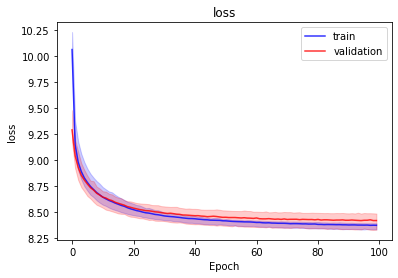

<b>bioma_loss</b>: 3.9289 (min: 3.9173, max: 3.9536)

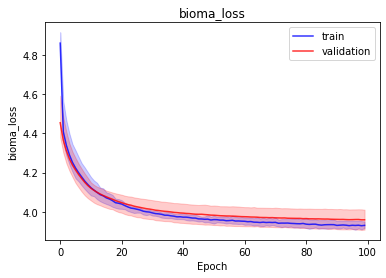

<b>domain_loss</b>: 4.3971 (min: 4.3780, max: 4.4110)

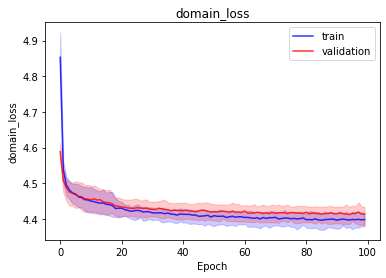

<b>latent_loss</b>: 0.0434 (min: 0.0332, max: 0.0705)

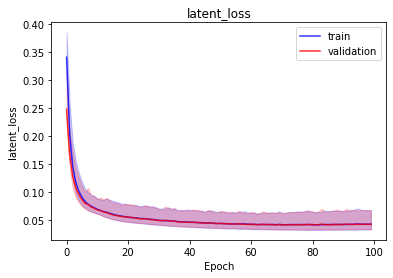

<b>bioma_mse</b>: 0.0000 (min: 0.0000, max: 0.0000)

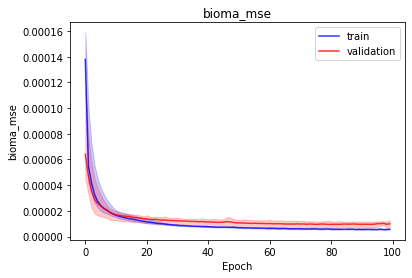

<b>bioma_mae</b>: 0.0005 (min: 0.0005, max: 0.0005)

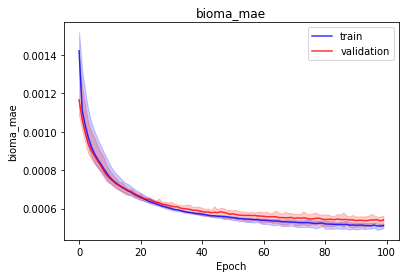

<b>bioma_mape</b>: 4949.3296 (min: 4838.7739, max: 5057.0435)

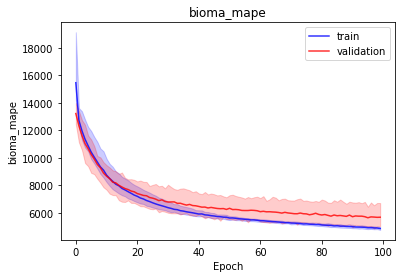

<b>bioma_BrayCurtis</b>: 0.1854 (min: 0.1797, max: 0.1899)

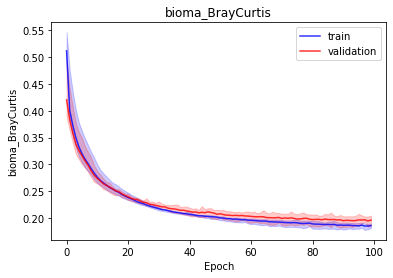

<b>bioma_pearson_corr</b>: 0.9458 (min: 0.9417, max: 0.9527)

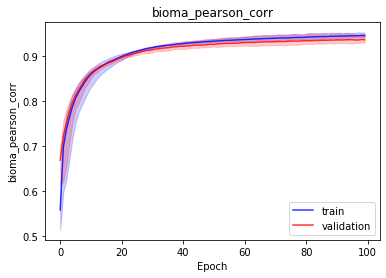

<b>bioma_jensen_shannon_divergence</b>: 0.2660 (min: 0.2510, max: 0.2742)

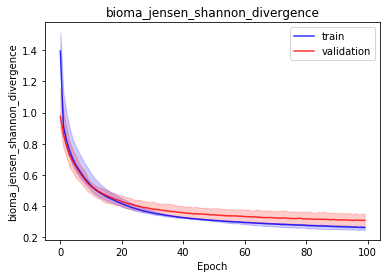

<b>domain_mse</b>: 0.0001 (min: 0.0001, max: 0.0001)

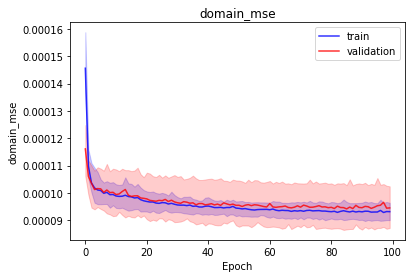

<b>domain_mae</b>: 0.0012 (min: 0.0011, max: 0.0012)

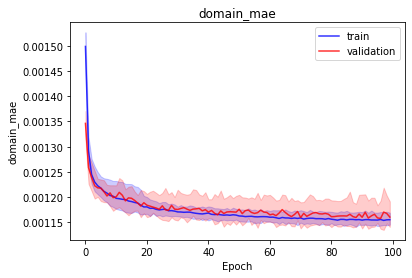

<b>domain_mape</b>: 11421.9766 (min: 11120.8311, max: 11584.1201)

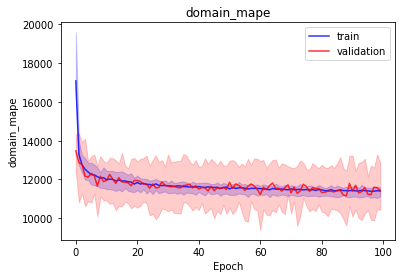

<b>domain_BrayCurtis</b>: 0.4159 (min: 0.4125, max: 0.4212)

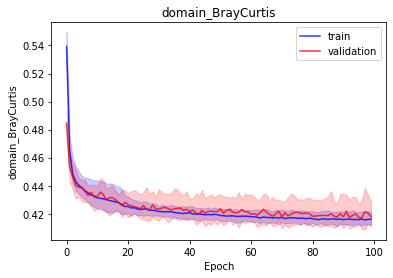

<b>domain_pearson_corr</b>: 0.7413 (min: 0.7356, max: 0.7452)

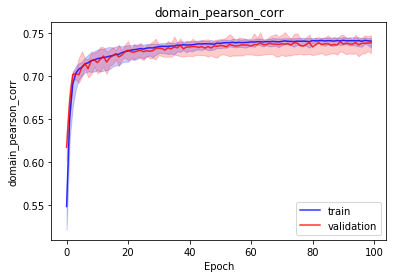

<b>domain_jensen_shannon_divergence</b>: 0.8953 (min: 0.8780, max: 0.9143)

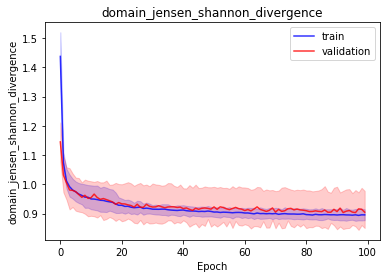

<b>latent_mae</b>: 0.0435 (min: 0.0332, max: 0.0705)

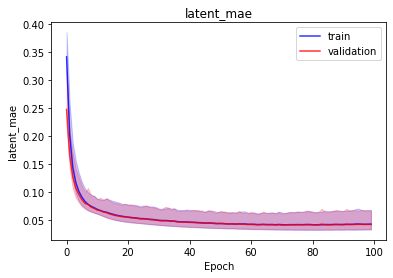

| Metric           | Mean    | Min     | Max     |
|:-----------------|--------:|--------:|--------:|
| loss | 8.371903567226214 | 8.330892916743597 | 8.390257633212594 |
| bioma_loss | 3.928886890411377 | 3.9173476696014404 | 3.953565835952759 |
| domain_loss | 4.39707088470459 | 4.377956390380859 | 4.410969257354736 |
| latent_loss | 0.04344373196363449 | 0.03322642669081688 | 0.07046964764595032 |
| bioma_mse | 5.488308488565963e-06 | 5.272956059343414e-06 | 5.6192511692643166e-06 |
| bioma_mae | 0.0005113061633892357 | 0.00049542699707672 | 0.0005242046900093555 |
| bioma_mape | 4949.32958984375 | 4838.77392578125 | 5057.04345703125 |
| bioma_BrayCurtis | 0.18535111844539642 | 0.1797490417957306 | 0.18991470336914062 |
| bioma_pearson_corr | 0.9457653760910034 | 0.9417427778244019 | 0.952690839767456 |
| bioma_jensen_shannon_divergence | 0.26596853137016296 | 0.25099897384643555 | 0.27424001693725586 |
| domain_mse | 9.297343785874546e-05 | 8.995409734779969e-05 | 9.624997619539499e-05 |
| domain_mae | 0.0011545398738235235 | 0.0011449935846030712 | 0.0011691475519910455 |
| domain_mape | 11421.9765625 | 11120.8310546875 | 11584.1201171875 |
| domain_BrayCurtis | 0.4158689081668854 | 0.4125358760356903 | 0.4211917519569397 |
| domain_pearson_corr | 0.7412930727005005 | 0.7356486916542053 | 0.7451840043067932 |
| domain_jensen_shannon_divergence | 0.8952735662460327 | 0.8780463337898254 | 0.9143321514129639 |
| latent_mae | 0.043450720608234406 | 0.03322733938694 | 0.0705229789018631 |


*************

## Test results 
| Metric           | Mean    | Min     | Max     |
|:-----------------|--------:|--------:|--------:|
| BrayCurtis | 0.4142569601535797 | 0.41038253903388977 | 0.41738995909690857 |
| pearson_corr | 0.7413817644119263 | 0.7375272512435913 | 0.7445780038833618 |
| jensen_shannon_divergence | 0.8490268588066101 | 0.8360449075698853 | 0.8636786937713623 |


### Best Otus
| OTU | mse |
|:----|----:|
| 810679 | 3.538966808405014e-13 |
| 942852 | 3.7818129162113523e-13 |
| 883748 | 3.911441483206435e-13 |
| 833317 | 4.080699265909121e-13 |
| 510316 | 4.118363094128552e-13 |
| 584331 | 4.179334016449904e-13 |
| 606989 | 4.1808432258740036e-13 |
| 769643 | 4.197258046765434e-13 |
| 242284 | 4.2011777086695123e-13 |
| 137818 | 4.3839273032066084e-13 |


### Worst Otus
| OTU | mse |
|:----|----:|
| 646549 | 0.04093826562166214 |
| 961783 | 0.008983222767710686 |
| 4339351 | 0.005010521970689297 |
| 849156 | 0.0007149355369620025 |
| 527397 | 0.0006191650172695518 |
| 573135 | 0.000540875073056668 |
| 353494 | 0.0004714062379207462 |
| 570086 | 0.00037789333146065474 |
| 1060517 | 0.0003141467459499836 |
| 566578 | 0.00028021360049024224 |


([(<tensorflow.python.keras.engine.training.Model at 0x7f2d9b7ec6a0>,
   <tensorflow.python.keras.engine.training.Model at 0x7f2d9b7cab38>),
  (<tensorflow.python.keras.engine.training.Model at 0x7f2d49071d30>,
   <tensorflow.python.keras.engine.training.Model at 0x7f2d490597b8>),
  (<tensorflow.python.keras.engine.training.Model at 0x7f2d9b309eb8>,
   <tensorflow.python.keras.engine.training.Model at 0x7f2d9b37b668>),
  (<tensorflow.python.keras.engine.training.Model at 0x7f2d9acccf98>,
   <tensorflow.python.keras.engine.training.Model at 0x7f2d9ad38518>),
  (<tensorflow.python.keras.engine.training.Model at 0x7f2d4aea3da0>,
   <tensorflow.python.keras.engine.training.Model at 0x7f2d4ae93278>)],
 {'BrayCurtis': (0.41425696, 0.41038254, 0.41738996),
  'pearson_corr': (0.74138176, 0.73752725, 0.744578),
  'jensen_shannon_divergence': (0.84902686, 0.8360449, 0.8636787)})

In [25]:
# 138
perform_test_experiment(cv_folds=5, 
                        epochs=100, 
                        batch_size=128, 
                        learning_rate=0.01, 
                        optimizer=optimizers.Adam,
                        learning_rate_scheduler=None,
                        input_transform=Percentage,
                        output_transform=tf.keras.layers.Softmax,
                        reconstruction_loss=MakeLoss(LossCategoricalCrossentropyWrapper, Percentage, None), 
                        latent_space=100, 
                        layers=[],
                        activation='sigmoid', 
                        activation_latent='sigmoid', 
                        show_results=True, 
                        device='/CPU:0',
                       filename_predictions='predictions_experiment_138.txt')